In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
# fill the missing value of age and fare

In [7]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [10]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [12]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Fare_median']=x_train['Age'].fillna(median_fare)
x_train['Fare_mean']=x_train['Age'].fillna(mean_fare)

In [13]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
463,48.0,13.0000,0,48.0,48.0,48.0,48.0
571,53.0,51.4792,2,53.0,53.0,53.0,53.0
786,18.0,7.4958,0,18.0,18.0,18.0,18.0
315,26.0,7.8542,0,26.0,26.0,26.0,26.0
543,32.0,26.0000,1,32.0,32.0,32.0,32.0


In [14]:
print('original age variable variance:',x_train['Age'].var())
print('Age variance after medain imputation:',x_train['Age_median'].var())
print('Age variance after mean imputation:',x_train['Age_mean'].var())
print('original fare variable variance:',x_train['Fare'].var())
print('Fare variance after medain imputation:',x_train['Fare_median'].var())
print('Fare variance after mean imputation:',x_train['Fare_mean'].var())




original age variable variance: 210.2517072477438
Age variance after medain imputation: 169.20731007048096
Age variance after mean imputation: 168.8519336687225
original fare variable variance: 2761.031434948639
Fare variance after medain imputation: 204.91494514688827
Fare variance after mean imputation: 170.29366350002152


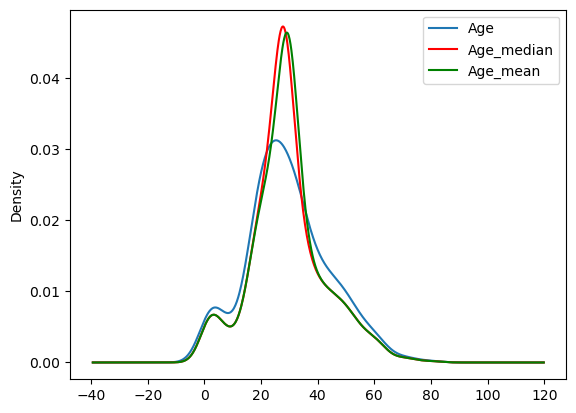

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)
# variable imputed with the median
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

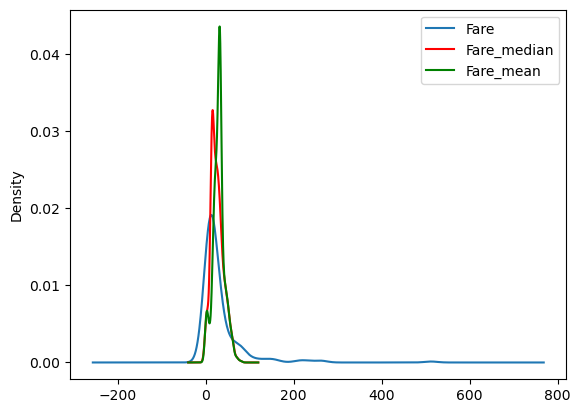

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)
# variable imputed with the median
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')
# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [17]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,210.251707,210.251707
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,97.632173,52.745200
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,-5.328300,-5.673883
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,172.431870,168.136143
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,168.851934,168.851934
Fare_median,210.251707,97.632173,-5.328300,172.431870,168.851934,204.914945,161.641308
Fare_mean,210.251707,52.745200,-5.673883,168.136143,168.851934,161.641308,170.293664


In [18]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,1.000000,1.000000
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,0.129700,0.076859
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,-0.221228,-0.258416
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.926022,0.990495
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.907750,0.995758
Fare_median,1.000000,0.129700,-0.221228,0.926022,0.907750,1.000000,0.865299
Fare_mean,1.000000,0.076859,-0.258416,0.990495,0.995758,0.865299,1.000000


<Axes: >

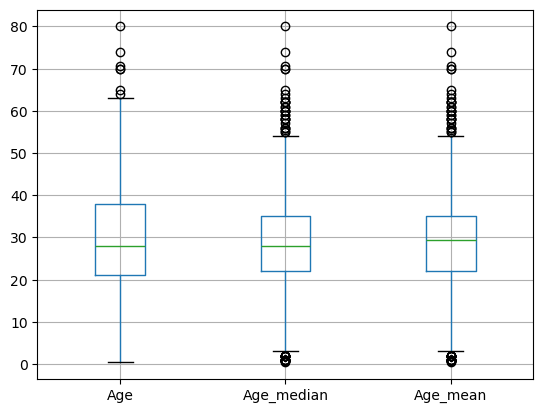

In [19]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

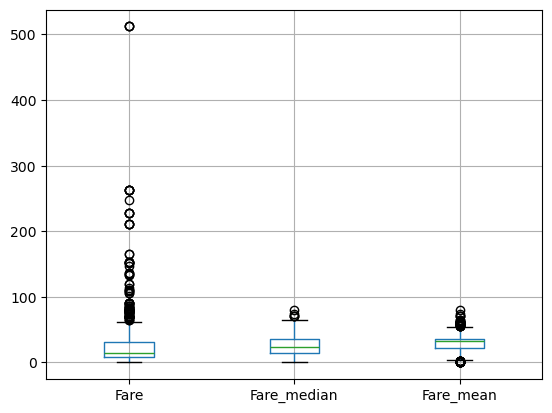

In [20]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

<h1>Using sklearn</h1>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
im1=SimpleImputer(strategy='median')
im2=SimpleImputer(strategy='mean')


In [26]:
trf=ColumnTransformer([
    ('im1',im1,['Age']),
    ('im2',im2,['Fare'])
],remainder='passthrough')


In [27]:
trf.fit(x_train)

C:\Users\91983\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('im1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('im2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['im1'].statistics_

array([28.75])

In [29]:
trf.named_transformers_['im2'].statistics_

array([32.61759689])

In [30]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [31]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])